karateclub是小规模图挖掘研究的一把瑞士军刀。 它基于其他开源线性代数、机器学习和图形信号处理库，例如 Numpy、Scipy、Gensim、PyGSP 和 Scikit-Learn， 可以对图形结构化数据进行无监督学习。

- 首先，它提供了节点和图级别的网络嵌入技术。 
- 其次，它包括多种重叠和非重叠的社区检测方法。 

<br>

## 数据格式
karateclub假设用户提供的用于**节点嵌入**和**社区检测**的 NetworkX 图具有以下重要属性：

- 节点用整数索引
- 节点索引从零开始，索引是连续的

**节点的属性矩阵**可以提供为 scipy sparse 和 numpy 数组。返回的社区成员字典和嵌入矩阵使用相同的数字连续索引。


<br>


## 安装

In [2]:
!pip3 install karateclub

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
     |████████████████████████████████| 62 kB 168 kB/s eta 0:00:011
     |████████████████████████████████| 204 kB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.8 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 1.9 MB/s eta 0:00:01
  Created wheel for karateclub: filename=karateclub-1.2.3-py3-none-any.whl size=97755 sha256=0c07a7c1e3622dd93dd7e271748d8fa9b2f5c73f78ac67c7d6845e556341717d
  Stored in directory: /Users/thunderhit/Library/Caches/pip/wheels/81/bd/b7/307c3d97ba8534b8e63c7bd317a7936fd200dbe177ca7f2319
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9407 sha256=19f13ee1ef923c655258bf7c90dbdf8f0a964ba5d5bfb7d9c1eb1d97ac9a750d
  Stored in directory: /Users/thunderhit/Library/Caches/pip/wheels/a1/eb/fd/cf02bb51e68591b188496e0df15d79e3260a59a189f80e66bb
Successfully built karateclub python-louvain
  Attempting uninstall: pandas
    Found exi

<br>

## 准备数据

In [120]:
import pandas as pd

df = pd.read_csv('karate_club_graph.csv')

print(df.columns)

print()

print(df.head().to_markdown())

print()

edges = list(zip(df['src'], df['tgt']))
print(edges)


Index(['src', 'tgt'], dtype='object')

|    |   src |   tgt |
|---:|------:|------:|
|  0 |     0 |     1 |
|  1 |     0 |     2 |
|  2 |     0 |     3 |
|  3 |     0 |     4 |
|  4 |     0 |     5 |

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


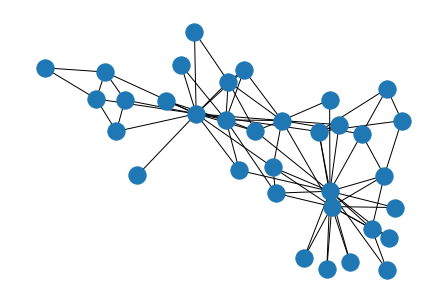

In [114]:
import networkx as nx

graph = nx.Graph()
graph.add_edges_from(edges)
nx.draw(graph)

<br>

## 社区发现

现在让我们使用LabelPropagation算法来发现网络中的社区结构。

In [130]:
from karateclub import LabelPropagation

model = LabelPropagation()
model.fit(graph)
cluster_membership = model.get_memberships()
cluster_membership

{23: 8,
 33: 8,
 5: 10,
 7: 1,
 28: 31,
 4: 10,
 3: 1,
 31: 31,
 20: 8,
 19: 1,
 6: 10,
 32: 8,
 29: 8,
 9: 1,
 14: 8,
 2: 1,
 0: 1,
 17: 1,
 25: 31,
 22: 8,
 11: 1,
 13: 1,
 1: 1,
 24: 31,
 15: 8,
 18: 8,
 26: 8,
 27: 8,
 16: 10,
 12: 1,
 30: 8,
 21: 1,
 8: 8,
 10: 10}

在有34个节点的图中，发现了4个社区，分别是1、8、10、31。

<br>

## Node embeddings

使用 Diff2vec 拟合数据的节点嵌入(向量)，具有少量维度、每个源节点的扩散和短欧拉游走。 

In [132]:
from karateclub import Diff2Vec

model = Diff2Vec(diffusion_number=2, 
                 diffusion_cover=20, 
                 dimensions=5)

model.fit(graph)
X = model.get_embedding()

In [133]:
X.shape

(34, 5)

In [134]:
X

array([[ 1.3687179 , -0.33502993, -0.3294797 ,  0.40154558,  1.0270709 ],
       [ 0.88167036, -0.3201618 , -0.34293872,  0.41519755,  0.71964073],
       [ 0.8756805 , -0.21934716, -0.33261183,  0.33785722,  0.51631075],
       [ 0.9768452 , -0.39260587, -0.39460638,  0.28851682,  0.8665034 ],
       [ 0.4809215 , -0.28729865, -0.19276802,  0.22588767,  0.07305563],
       [ 0.5580538 , -0.28137547, -0.1947159 ,  0.23712516,  0.49257705],
       [ 0.23477663,  0.04262228,  0.07154325,  0.02909669,  0.33999097],
       [ 1.1882199 , -0.21742308, -0.26985615,  0.44171503,  0.6679048 ],
       [ 1.0287609 , -0.27409104, -0.04119629,  0.30143994,  0.704676  ],
       [ 0.5700088 , -0.26341844,  0.01560158, -0.08039217,  0.41796318],
       [ 0.5753763 , -0.2242508 , -0.1795436 ,  0.0705331 ,  0.46571913],
       [ 0.46763912, -0.17108741, -0.22459361,  0.03058788,  0.05998428],
       [ 0.5500626 , -0.12745889, -0.28661036,  0.16889155,  0.48200938],
       [ 0.6217582 , -0.10251168, -0.0